<a href="https://colab.research.google.com/github/AvokrichA/Machine_learning/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рассмотрим простейшие функции потерь для задачи регрессии
Для начала импортируем необходимые библиотеки:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Пример 1.
Пусть имеется набор точек x = [0, 1, 2, 3, 4, 5] и
y = [0, 1, 2, 3, 4, 5]


In [2]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])


Отобразим их на графике


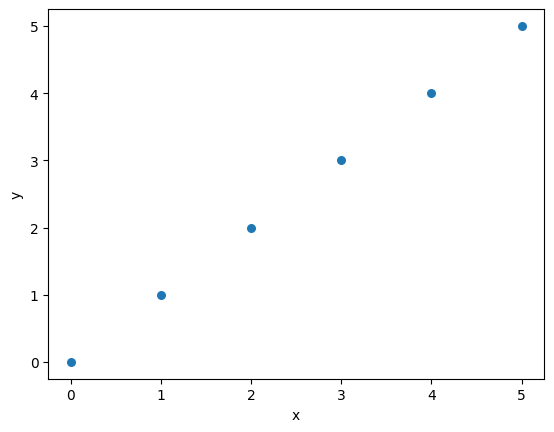

In [3]:
plt.scatter(y, y, s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Очевидно, что точки лежат на одной линии, но представим, что мы этого не знаем и
нам надо определить эту линию.
Вариантов может быть достаточно много:

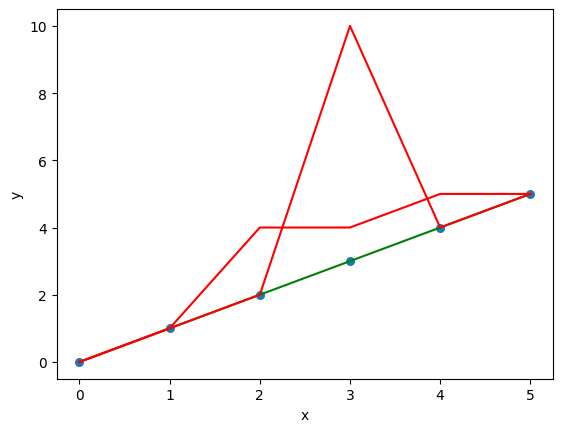

In [4]:
y1 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([0, 1, 2, 10, 4, 5])
y3 = np.array([0, 1, 4, 4, 5, 5])
plt.scatter(y, y, s=30)
plt.plot(y1, 'g')
plt.plot(y2, 'r')
plt.plot(y3, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что зеленая линия — это то, что мы хотели найти.
Осталось доказать математически, что это наилучшее приближение функции
(линии) к исходному набору данных (точкам).
Воспользуемся самой простой идеей и вычтем из правильных ответов
предсказанные и сложим результат.
Для y3 получим (давайте устно посчитаем ошибку):
(0-0)+(1-1)+(2-4)+(3-4)+(4-5)+(5-5) = -4
19
Аналогично посчитаем для y1 и y2, а использование типа данных numpy array
упростит наши вычисления:


In [5]:
e1 = sum(y - y1)
e2 = sum(y - y2)
e3 = sum(y - y3)
print(e1)
print(e2)
print(e3)


0
-7
-4


И для получения средней ошибки для каждого объекта разделим полученное
значение на число объектов.
Для y3 получим следующее:
((0-0)+(1-1)+(2-4)+(3-4)+(4-5)+(5-5)) / 6 = -4 / 6 = -0.66

In [6]:
e1 = sum(y - y1)/len(y)
e2 = sum(y - y2)/len(y)
e3 = sum(y - y3)/len(y)
print(e1)
print(e2)
print(e3)

0.0
-1.1666666666666667
-0.6666666666666666


Функция потерь в машинном обучении является мерой того, насколько точно
полученная модель способна предсказать целевую функцию (правильные ответы).
20
В рассмотренном примере: мы посчитали самую простую функцию потерь и
получили, что в y1 наиболее точные предсказания.
Функция потерь по всем объектам называется эмпирическим риском. Чем меньше
эмпирический риск, тем точнее работает модель машинного обучения.
Только рассмотренную функцию используют редко, а вот ее небольшое
видоизменение довольно-таки часто: называется такая функция потерь MAE —
mean absolute error — cредняя абсолютная ошибка. Это еще одна функция потерь,
используемая в регрессионных моделях.
MAE — это сумма абсолютного значения разницы (то есть по модулю) между
целевым значением и прогнозируемым значением. Он только измеряет среднюю
длину модуля предсказанной ошибки значения, независимо от направления, и
диапазон значений составляет от 0 до положительной бесконечности.
То есть, чем ближе MAE к 0, тем модель лучше.
Рассчитаем MAE для нашего примера:


In [7]:
e1 = sum(abs(y - y1))/len(y)
e2 = sum(abs(y - y2))/len(y)
e3 = sum(abs(y - y3))/len(y)
print(e1)
print(e2)
print(e3)

0.0
1.1666666666666667
0.6666666666666666


Аналогичный функционал есть в библиотеке sklearn:

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y3)


0.6666666666666666

# Пример 2
Сгенерируем большее количество точек, для это воспользуемся функционалом
numpy random.
Команда np.random.rand (10, 1) сгенерирует 10 случайных чисел со
значениями 0 до 1


In [9]:
np.random.rand(10, 1)


array([[0.52276238],
       [0.30458209],
       [0.07049501],
       [0.31528822],
       [0.92076268],
       [0.07542405],
       [0.95968719],
       [0.99525309],
       [0.58907428],
       [0.30298327]])

Команда np.random.randn (10, 1) сгенерирует 10 случайных чисел, среднее
которых будет равно 0


In [10]:
np.random.randn(10, 1)

array([[-1.58634313],
       [ 2.07795042],
       [-0.3180084 ],
       [-1.26705642],
       [-1.60253707],
       [ 1.80598888],
       [ 0.04935776],
       [ 0.92149489],
       [-0.85481082],
       [-1.67100407]])

Пусть нам заданы 100 точек:


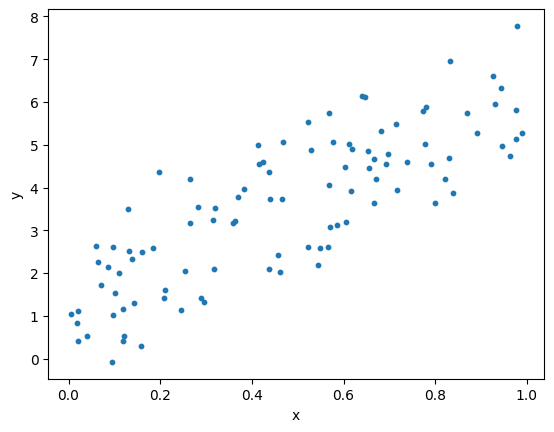

In [11]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(100, 1)
y = 1 + 5 * x + np.random.randn(100, 1)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


У нас вновь может быть несколько вариантов того, как модель может выглядеть:
наша задача определить, какая модель будет лучше — то есть с минимальной
функцией потерь.

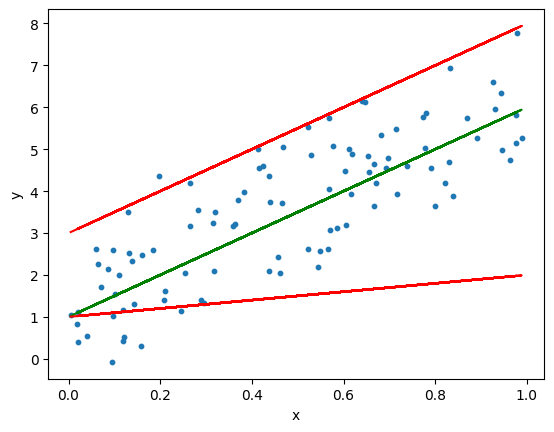

In [12]:
y1 = 1 + 5 * x
y2 = 3 + 5 * x
y3 = 1 + 1 * x
plt.scatter(x, y, s=10)
plt.plot(x, y1, 'g')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Определим, какая модель лучше с помощью уже известной нам MAE:

In [13]:
e1 = mean_absolute_error(y, y1)
e2 = mean_absolute_error(y, y2)
e3 = mean_absolute_error(y, y3)
print(e1)
print(e2)
print(e3)

0.8623845994287561
1.8153285514201543
2.180005707537805


Получаем, что ответы модели y1 (зеленая линия на графике) дают
минимальное значение MAE, что означает, что прогноз, согласно модели
1, наиболее точный.
